https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u
https://data.cityofnewyork.us/City-Government/Parks-Zones/rjaj-zgq7

`pip install geopandas`

`pip install descartes`

In [7]:
import geopandas as gp
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
zipcode_shape_data = gp.read_file(
    '../data/ZIP_CODE_040114 (3)/ZIP_CODE_040114.shp')\
    .to_crs(epsg=4326) # converts the coordinate system to familiar form

park_shape_data = gp.read_file(
    '../data/Parks Zones/geo_export_61d95deb-be69-4c1e-b295-8d44e5791c6b.shp')


/usr/local/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [3]:
borough_dict = {'B': 'Brooklyn', 'X': 'Bronx', 'R':'Staten Island', 'M':'Manhattan', 'Q':'Queens'}


In [4]:
len(zipcode_shape_data['ZIPCODE'].unique())

248

In [6]:
zipcode_shape_data = zipcode_shape_data[['ZIPCODE', 'POPULATION',  'AREA', 'PO_NAME', 'COUNTY', 'geometry']]

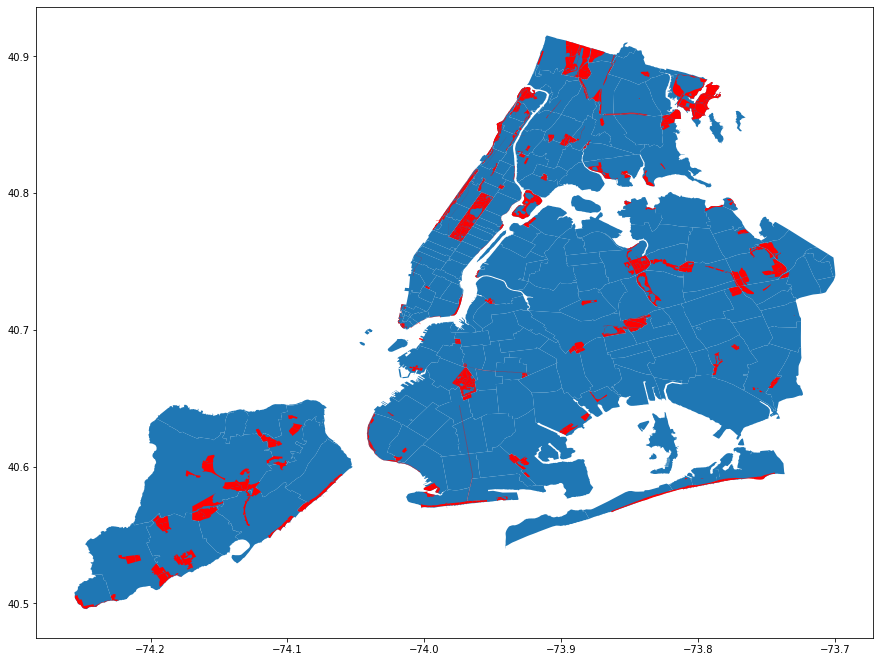

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
zipcode_shape_data.plot(ax=ax)
park_shape_data.plot(ax=ax, color='red')

In [9]:
county_map = {'Kings':'Brooklyn', 
 'New York':'Manhattan', 
 'Richmond':'Staten Island',
'Queens':'Queens',
'Bronx':'Bronx'}

county_borough_map = {'Kings':'B', 
 'New York':'M', 
 'Richmond':'R',
'Queens':'Q',
'Bronx':'X'}

In [10]:
zipcode_shape_data['Borough'] = zipcode_shape_data['COUNTY'].map(county_borough_map)


In [11]:
zipcode_shape_data

,ZIPCODE,POPULATION,AREA,PO_NAME,COUNTY,geometry,Borough
0,11436,18681.0,2.269930e+07,Jamaica,Queens,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Q
1,11213,62426.0,2.963100e+07,Brooklyn,Kings,"POLYGON ((-73.93740 40.67973, -73.93487 40.679...",B
2,11212,83866.0,4.197210e+07,Brooklyn,Kings,"POLYGON ((-73.90294 40.67084, -73.90223 40.668...",B
3,11225,56527.0,2.369863e+07,Brooklyn,Kings,"POLYGON ((-73.95797 40.67066, -73.95576 40.670...",B
4,11218,72280.0,3.686880e+07,Brooklyn,Kings,"POLYGON ((-73.97208 40.65060, -73.97192 40.650...",B
...,...,...,...,...,...,...,...
258,10310,25003.0,5.346328e+07,Staten Island,Richmond,"POLYGON ((-74.12065 40.64104, -74.12057 40.641...",R
259,11693,11052.0,3.497516e+06,Far Rockaway,Kings,"POLYGON ((-73.84076 40.62536, -73.84306 40.627...",B
260,11249,28481.0,1.777221e+07,Brooklyn,Kings,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",B
261,10162,0.0,2.103489e+04,New York,New York,"POLYGON ((-73.95133 40.76931, -73.95165 40.769...",M


In [12]:
park_shape_data 

,acres,borough,communityb,councildis,department,descriptio,gispropnum,location,nys_assemb,nys_senate,omppropid,precinct,propname,retired,retireddat,sitename,subcategor,us_congres,zipcode,geometry
0,13.264146,X,209,18,X-09,Soundview Park Zone 4,X118,Ballfields And Lawns Along Lafayette Ave Betwe...,85,32,X118-ZN04,3,Soundview Park,False,None,Soundview Park Zone 4,Large Park Zone,15,10473,"POLYGON ((-73.87620 40.81898, -73.87636 40.818..."
1,13.398159,Q,407,19,Q-07,Herman A Macneil Park-MacNeil Park Zone 1,Q009,West Of Paved Path Running N. From 119th St,27,11,Q009-ZN01,109,Herman A Macneil Park,False,None,MacNeil Park Zone 1,Large Park Zone,14,11356,"POLYGON ((-73.85230 40.79109, -73.85250 40.791..."
2,1.309977,M,"104, 107",6,M-07,Broadway Malls Zone 1,M094,Broadway Between W 60 & W 71 Sts.,"67, 75",27,M095-ZN01,18,Broadway Malls,False,None,Broadway Malls Zone 1,Large Park Zone,10,10023,"MULTIPOLYGON (((-73.98219 40.77381, -73.98219 ..."
3,4.747322,M,"107, 109",7,M-14,Riverside Park-Skate Park And Basketball Courts,M071,109th To 112th Sts Next To Henry Hudson Parkway,69,31,M071-ZN22,24,Riverside Park,False,None,Skate Park And Basketball Courts,Flagship Park Zone,10,10024,"POLYGON ((-73.96968 40.80681, -73.96966 40.806..."
4,7.225119,Q,"414, 484",32,Q-14,Rockaway Beach & Boardwalk-Rockaway Beach 11c,Q164,Btwn 146th And 149th St,23,15,Q164-ZN11C,100,Rockaway Beach & Boardwalk,False,None,Rockaway Beach 11c,Beach Zone,5,11694,"POLYGON ((-73.86340 40.56727, -73.86348 40.567..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,7.118280,B,310,43,B-10,Shore Park And Parkway-Shore Road Park Zone 6,B082,"4 Ave, Wakeman Pl, Ridge Blvd",Null,Null,B082-ZN06,68,Shore Park And Parkway,False,None,Shore Road Park Zone 6,Large Park Zone,Null,11220,"MULTIPOLYGON (((-74.02479 40.63799, -74.02477 ..."
586,0.000000,Q,402,26,Q-02,Hunter's Point South Park Zone 2,Q471,None,37,12,Q471-ZN02,108,None,False,None,Hunter's Point South Park Zone 2,Large Park Zone,12,11101,"POLYGON ((-73.96202 40.73828, -73.96204 40.738..."
587,4.491033,M,107,6,M-14,Riverside Park-South Waterfront West Side,M071,"67 St To 72 St, Hudson River To Middle Roadway...",67,"27, 31",M071-ZN30,20,Riverside Park,True,20170404000000.00000,South Waterfront West Side,Flagship Park Zone,10,10023,"POLYGON ((-73.98824 40.78006, -73.98838 40.779..."
588,47.391390,M,164,6,M-13,Central Park-North Meadow,M010,"West Drive, East Drive, 97 St Transverse, Sout...","69, 68",29,M010-ZN37,5,Central Park,False,None,North Meadow,Flagship Park Zone,"10, 13",10025,"POLYGON ((-73.95731 40.78989, -73.95731 40.789..."


In [13]:
acre_to_sqmi = 0.0015625
(park_shape_data['acres']*acre_to_sqmi).sum()

19.885777420328125

In [14]:
sqft_to_sqmi = 3.58701e-8
(zipcode_shape_data['AREA']*sqft_to_sqmi).sum()

300.1521594184975

In [15]:
# percentage of nyc that is made up of parks
(park_shape_data['acres']*acre_to_sqmi).sum()/\
    (zipcode_shape_data['AREA']*sqft_to_sqmi).sum()*100

6.625232168528794